In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("https://sololearn.com/uploads/files/iris.csv")
data.shape

(150, 6)

In [4]:
data.head()

,id,sepal_len,sepal_wd,petal_len,petal_wd,species
0,0,5.1,3.5,1.4,0.2,iris-setosa
1,1,4.9,3.0,1.4,0.2,iris-setosa
2,2,4.7,3.2,1.3,0.2,iris-setosa
3,3,4.6,3.1,1.5,0.2,iris-setosa
4,4,5.0,3.6,1.4,0.2,iris-setosa


In [5]:
data.columns

Index(['id', 'sepal_len', 'sepal_wd', 'petal_len', 'petal_wd', 'species'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         150 non-null    int64  
 1   sepal_len  150 non-null    float64
 2   sepal_wd   150 non-null    float64
 3   petal_len  150 non-null    float64
 4   petal_wd   150 non-null    float64
 5   species    150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [7]:
data.corr()

,id,sepal_len,sepal_wd,petal_len,petal_wd
id,1.000000,0.716676,-0.402301,0.882637,0.900027
sepal_len,0.716676,1.000000,-0.117570,0.871754,0.817941
sepal_wd,-0.402301,-0.117570,1.000000,-0.428440,-0.366126
petal_len,0.882637,0.871754,-0.428440,1.000000,0.962865
petal_wd,0.900027,0.817941,-0.366126,0.962865,1.000000


<Figure size 1400x1400 with 0 Axes>

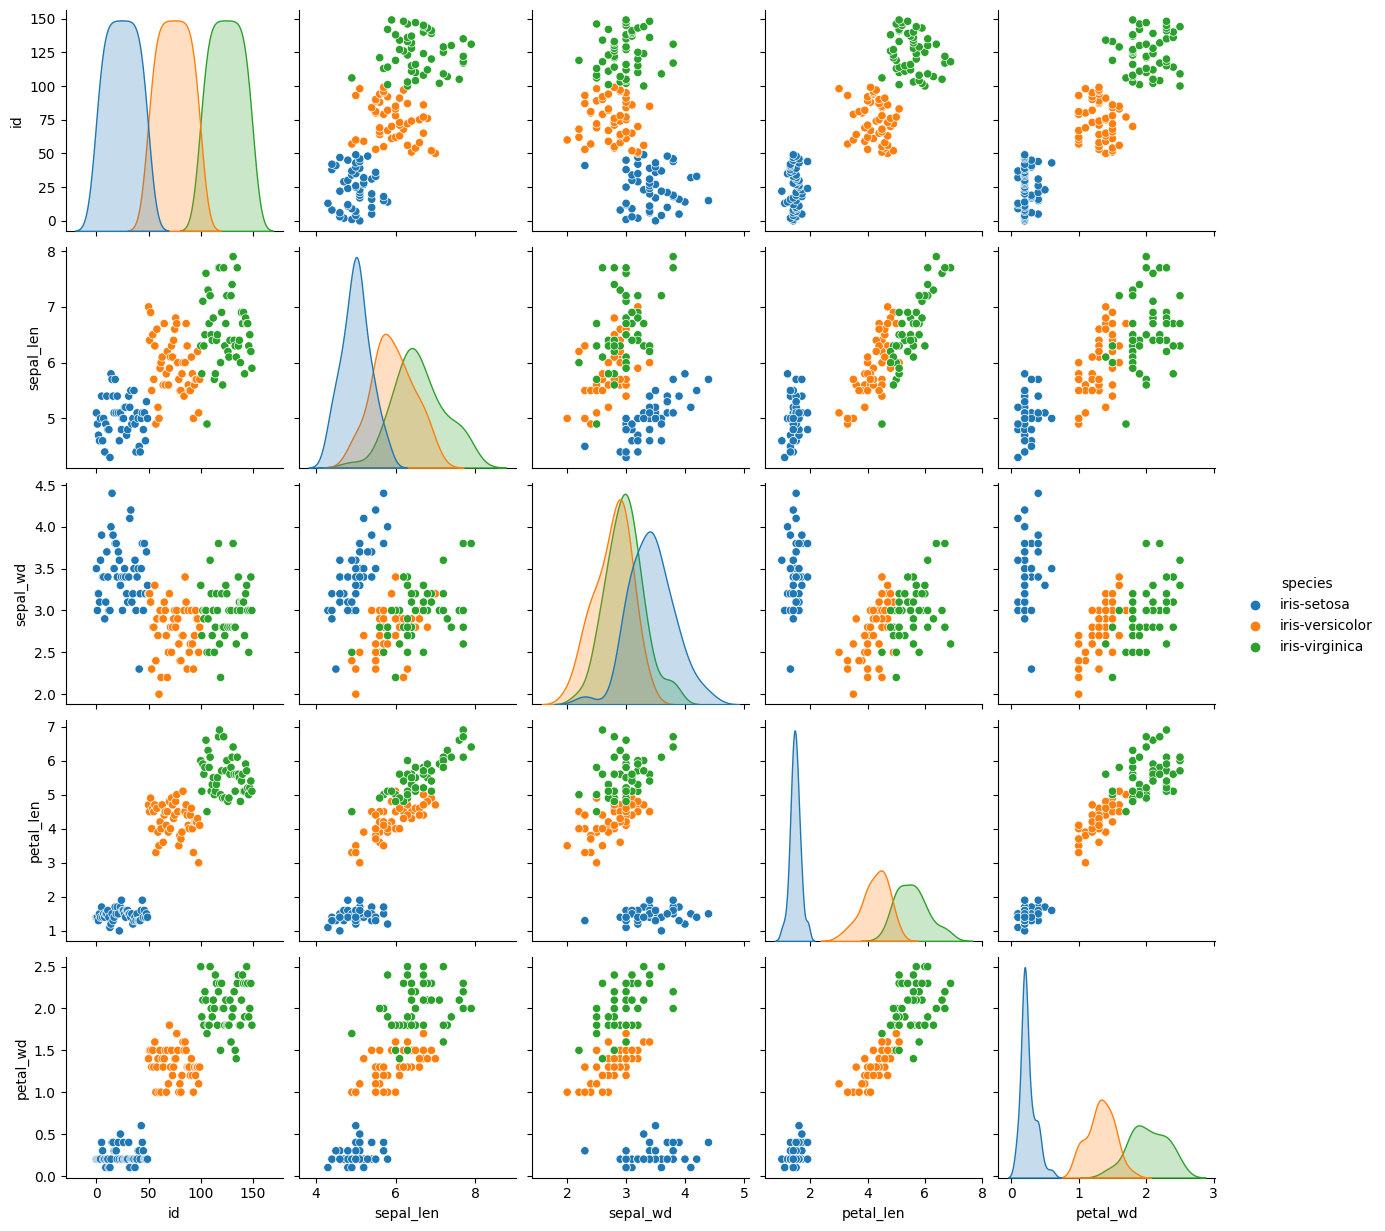

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14,14))
sns.pairplot(data=data,hue="species")
plt.show()

<AxesSubplot:>

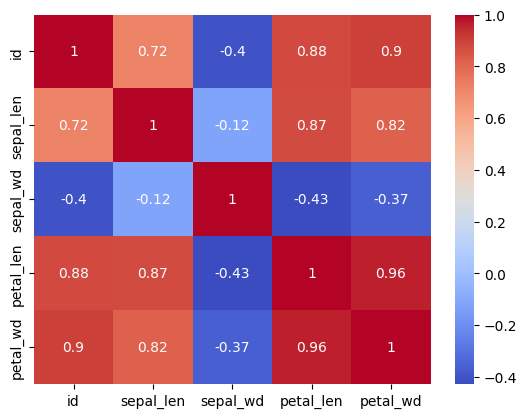

In [9]:
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

In [10]:
data.drop("id",axis=1,inplace=True)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(x,
                                                 y,
                                                 test_size=0.20,
                                                 random_state=1,
                                                 stratify=y)
knc = KNeighborsClassifier(n_neighbors=12)
knc.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=12)

In [13]:
pred = knc.predict(X_test)
pred

array(['iris-virginica', 'iris-setosa', 'iris-versicolor', 'iris-setosa',
       'iris-setosa', 'iris-setosa', 'iris-virginica', 'iris-virginica',
       'iris-virginica', 'iris-versicolor', 'iris-setosa',
       'iris-versicolor', 'iris-virginica', 'iris-versicolor',
       'iris-virginica', 'iris-setosa', 'iris-virginica',
       'iris-versicolor', 'iris-versicolor', 'iris-virginica',
       'iris-versicolor', 'iris-versicolor', 'iris-setosa', 'iris-setosa',
       'iris-virginica', 'iris-versicolor', 'iris-setosa', 'iris-setosa',
       'iris-versicolor', 'iris-versicolor'], dtype=object)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,pred)

0.9666666666666667

In [15]:
new = [[5.1,4.5,1.4,0.2]]
knc.predict(new)

array(['iris-setosa'], dtype=object)

In [16]:
import joblib
joblib.dump(knc,"data.pkl")
model = joblib.load("data.pkl")
model

KNeighborsClassifier(n_neighbors=12)

In [22]:
import pickle
with open ("model.pkl","wb") as f:
    pickle.dump(knc,f)
with open("model.pkl","rb") as f:
    np = pickle.load(f)

In [23]:
np

KNeighborsClassifier(n_neighbors=12)